In [1]:
from Preprocess.PDFprocess import PDFprocessor
from langchain_chroma import Chroma

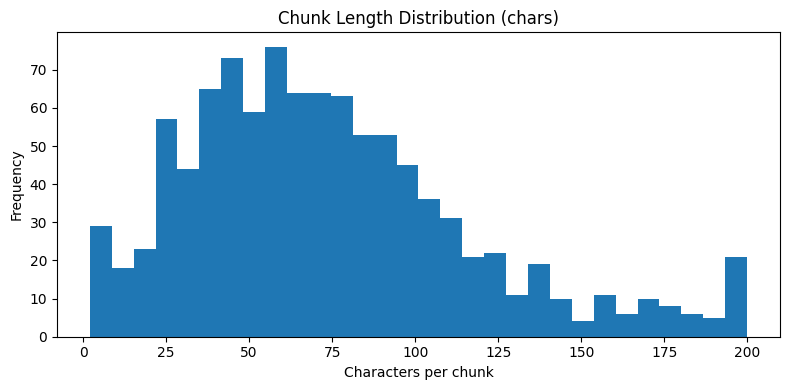

In [2]:
proc=PDFprocessor(pdf_path="D:/PROJECT-PAPER/10ms/Dataset/HSC26-Bangla1st-Paper.pdf")
proc.load_pdf()
proc.clean()
proc.clean_bangla(split_sentences=True)
#proc.visualize_paragraph_lengths()
chunks=proc.chunk(chunk_size=200,chunk_overlap=20)
proc.visualize_chunk_lengths()


In [3]:
chunks[0:5]  # Display first 5 chunks

[Document(metadata={'page': 1}, page_content='অনলাইন ব্যাচ সম্পর্কিত যেককাকনা জিজ্ঞাাসা অপরিরিতা আল ািয রিষয় িাাং া ম পত্র'),
 Document(metadata={'page': 2}, page_content='।।'),
 Document(metadata={'page': 2}, page_content='অনুপলেি িািা কী কলি জীরিকা রনিবাহ কিলতন ক ডাক্তার্ি খ ওকালর্ত গ মাস্টার্ি ঘ ব্যব্সা ।।'),
 Document(metadata={'page': 2}, page_content='োোলক ভাগ্য দেিতাি প্রধান এলজন্ট ি াি কািণ তািক প্রর্তপজি খ প্রভাব্ গ র্ব্চক্ষণতা ঘ কূট ব্ুর্ি র্নকচি অনুকেদটি পক়ে ও সংখযক প্রকেি উিি দাও ।।'),
 Document(metadata={'page': 2}, page_content='র্পতৃহীন দীপুি চাচাই র্িকলন পর্িব্াকিি কতিা ।।')]

In [4]:
import pandas as pd
from tabulate import tabulate

# after you’ve done proc.load_pdf(), proc.clean(), proc.chunk():
samples = []
for i, chunk in enumerate(proc.chunks[:10]):
    text = chunk.page_content.replace("\n", " ")
    samples.append({
        "index": i,
        "length": len(text),
        "snippet": text[:200] + ("…" if len(text) > 200 else "")
    })

df = pd.DataFrame(samples)
display(df)

print(tabulate(df, headers="keys", tablefmt="github"))


,index,length,snippet
0,0,77,অনলাইন ব্যাচ সম্পর্কিত যেককাকনা জিজ্ঞাাসা অপরি...
1,1,2,।।
2,2,86,অনুপলেি িািা কী কলি জীরিকা রনিবাহ কিলতন ক ডাক্...
3,3,140,োোলক ভাগ্য দেিতাি প্রধান এলজন্ট ি াি কািণ তািক...
4,4,46,র্পতৃহীন দীপুি চাচাই র্িকলন পর্িব্াকিি কতিা ।।
5,5,56,দীপু র্িজক্ষত হকলও তাি র্সিান্ত যনও াি ক্ষমতা ...
6,6,125,চাচা তাি র্ব্ক ি উকদযাগ র্নকলও যেৌতুক র্নক ব্া...
7,7,73,দীপু যমক টিি ির্ব্ যদকখ মুগ্ধ হকলও তাি চাচাকক ...
8,8,92,েীপুি িািাি সলে অপরিরিতা গ্লেি দকান িরিলেি রে ...
9,9,75,উক্ত িরিলে প্রাধানয দপলয়লে যদৌিাত্ম হীনম্মনযত...


|    |   index |   length | snippet                                                                                       |
|----|---------|----------|-----------------------------------------------------------------------------------------------|
|  0 |       0 |       77 | অনলাইন ব্যাচ সম্পর্কিত যেককাকনা জিজ্ঞাাসা অপরিরিতা আল ািয রিষয় িাাং া ম পত্র                                            |
|  1 |       1 |        2 | ।।                                                                                            |
|  2 |       2 |       86 | অনুপলেি িািা কী কলি জীরিকা রনিবাহ কিলতন ক ডাক্তার্ি খ ওকালর্ত গ মাস্টার্ি ঘ ব্যব্সা ।।                                      |
|  3 |       3 |      140 | োোলক ভাগ্য দেিতাি প্রধান এলজন্ট ি াি কািণ তািক প্রর্তপজি খ প্রভাব্ গ র্ব্চক্ষণতা ঘ কূট ব্ুর্ি র্নকচি অনুকেদটি পক়ে ও সংখযক প্রকেি উিি দাও ।। |
|  4 |       4 |       46 | র্পতৃহীন দীপুি চাচাই র্িকলন পর্িব্াকিি কতিা ।।                                                                  |
|  5 |    

In [5]:
from Database.Chroma import extract_embeddings_batched, embeddings

d:\PROJECT-PAPER\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
W0723 10:02:56.768000 28104 Lib\site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


 page  char_count  word_count
    1          80          14
    2        1419         202
    3        1787         271
    4        1415         210
    5         470          72
    6        2092         112
    7        2053         120
    8        2430         143
    9        2059         121
   10        1649         104
   11        1941         131
   12        2283         156
   13        2043         122
   14        2176         136
   15        2257         138
   16        1727         119
   17        1328         240
   18        2124         272
   19        1679          73
   20        1341         167
   21        1909          92
   22        1334          51
   23        2045         231
   24        2045         226
   25        1524         144
   26        1789         173
   27        1559         136
   28        1683         130
   29        1106         106
   30        1925         227
   31        2208         248
   32        1718         210
   33     

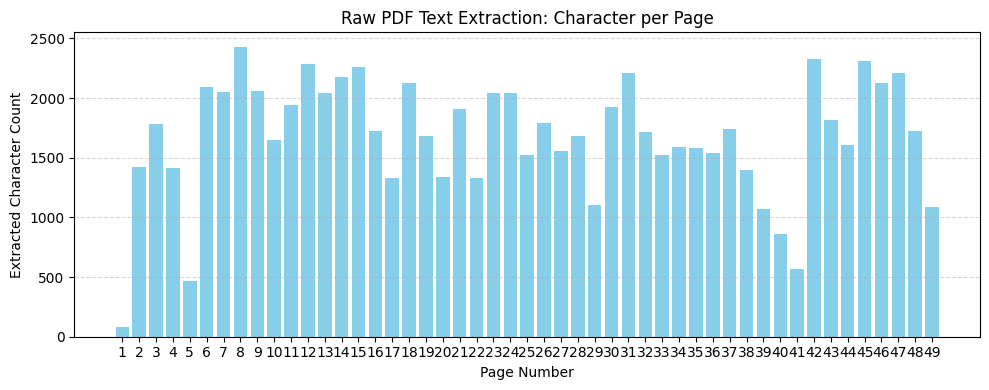

In [6]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1) Ensure your project root is on Python’s path
#    Adjust the path to where your Preprocess folder lives
project_root = r"D:/PROJECT-PAPER/10ms"
if project_root not in sys.path:
    sys.path.append(project_root)

# 2) Import your PDFprocessor
from Preprocess.PDFprocess import PDFprocessor

# 3) Load the raw pages
proc = PDFprocessor(os.path.join(project_root, "Dataset", "HSC26-Bangla1st-Paper.pdf"))
raw_docs = proc.load_pdf()

# 4) Build a DataFrame of page → character & word counts
rows = []
for doc in raw_docs:
    page = doc.metadata.get("page", None)
    text = doc.page_content or ""
    rows.append({
        "page": page,
        "char_count": len(text),
        "word_count": len(text.split())
    })

df = pd.DataFrame(rows).sort_values("page")

# 5) Show the table so you can see any pages with zero or tiny text
print(df.to_string(index=False))

# 6) Visualize with a bar chart
plt.figure(figsize=(10,4))
plt.bar(df["page"], df["char_count"], color="skyblue")
plt.xlabel("Page Number")
plt.ylabel("Extracted Character Count")
plt.title("Raw PDF Text Extraction: Character per Page")
plt.xticks(df["page"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [8]:
import sys
from langgraph.graph import START, StateGraph
from Database.Chroma import build_rag_index
from model.llm import llm
from Preprocess.PDFprocess import PDFprocessor
from langchain.schema import HumanMessage
from transformers import AutoTokenizer
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

# load once at top

vector_store,chunks = build_rag_index(
    pdf="D:/PROJECT-PAPER/10ms/Dataset/HSC26-Bangla1st-Paper.pdf",
    collection_name="10ms_collection",
    persist_directory="./chroma_langchain_db",
    chunk_size=200,
    chunk_overlap=50,
)


template = """\
আপনি একজন বাংলা ভাষী সহকারী।
নিম্নলিখিত প্রসঙ্গ ব্যবহার করে *শুধুমাত্র* প্রশ্নের উত্তর দিন—  
কোনো নতুন তথ্য তৈরি করবেন না।  
যদি প্রসঙ্গে উত্তর না থাকে, “১) দুঃখিত, আমার কাছে যথাযথ তথ্য নেই” লিখুন।  

প্রসঙ্গ:
{context}

প্রশ্ন: {question}

উত্তর:
"""

prompt = PromptTemplate(
    input_variables=["context","question"],
    template=template
)

# Build the RetrievalQA chain
qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",                             
    retriever=vector_store.as_retriever(search_kwargs={"k": 2}),
    chain_type_kwargs={"prompt": prompt},
)

#inspect retrieval during dev
def debug_retrieval(q):
    docs = vector_store.similarity_search(q, k=5)
    print("\n--- Retrieved Chunks ---")
    for i, d in enumerate(docs, 1):
        print(f"[{i}]\n{d.page_content[:200]!r}\n")
    print("------------------------\n")

def ask_loop():
    print("RAG is Ready — Type 'exit' to leave\n")
    while True:
        q = input("Question: ").strip()
        if not q or q.lower() in ("exit","quit"):
            break

        debug_retrieval(q)   

        ans = qa.run(q)
        print("\n Answer:", ans.strip(), "\n" + "-"*60 + "\n")

if __name__ == "__main__":
    ask_loop()


RAG is Ready — Type 'exit' to leave


--- Retrieved Chunks ---
[1]
'মমতা তাি স্বামী ও স্বামীি পর্িব্াকিি সকলকক যব্াঝাকনাি যচষ্ট্া ককি র্কন্তু স্বামীি পর্িব্াকিি যলাকিন যতা দূকিি কথা তাি স্বামীই র্কিুব্ুঝকত চা না ।।'

[2]
'মমতা তাি স্বামী ও স্বামীি পর্িব্াকিি সকলকক যব্াঝাকনাি যচষ্ট্া ককি র্কন্তু স্বামীি পর্িব্াকিি যলাকিন যতা দূকিি কথা তাি স্বামীই র্কিুব্ুঝকত চা না ।।'

[3]
'মমতা তাি স্বামী ও স্বামীি পর্িব্াকিি সকলকক যব্াঝাকনাি যচষ্ট্া ককি র্কন্তু স্বামীি পর্িব্াকিি যলাকিন যতা দূকিি কথা তাি স্বামীই র্কিু ব্ুঝকত চা না ।।'

[4]
'অপর্ির্চতা গকে না ককি ব্ স কত ব্লা হক কি ক ব্িি খ ব্িি গ ব্িি ঘ ব্িি ।।'

[5]
'অপর্ির্চতা গকেি না ককি নাম কী র্িল িরি ইউরনট ক হর্িি খ র্ব্নু গ অনুপম ঘ িম্ভুনাথ উিি গ ।।'

------------------------


 Answer: আপনি একজন বাংলা ভাষী সহকারী।
নিম্নলিখিত প্রসঙ্গ ব্যবহার করে *শুধুমাত্র* প্রশ্নের উত্তর দিন—  
কোনো নতুন তথ্য তৈরি করবেন না।  
যদি প্রসঙ্গে উত্তর না থাকে, “১) দুঃখিত, আমার কাছে যথাযথ তথ্য নেই” লিখুন।  

প্রসঙ্গ:
মমতা তাি স্বামী ও স্বামীি পর্িব্াকিি সকলকক যব্াঝাকন